# Homework 1

## Instructions

First, ensure you have cloned the [course repository](https://github.com/lydiaYchen/DDL25Spring).

Then, open the [interactive notebook version](https://github.com/lydiaYchen/DDL25Spring/blob/main/lab/homework-1.ipynb) of this homework from your local copy.

For part A, fill in the code and answers within the notebook and save your changes.

For part B, create and archive the necessary Python/shell scripts together.

Finally, upload the notebook and the archive to the assignment in ILIAS.

## Part A (12 points)

### Note

When not otherwise specified, use the following parameter values in experiment runs:
- `nr_clients` (N): 100
- `lr`: 0.01
- `client_fraction` (C): 0.1
- `nr_local_epochs` (E): 1
- `batch_size` (B): 100
- `nr_rounds`: 10
- `iid`: True

For all exercises, pass `seed = 10` to calls for splitting data, server initialization, or plotting.

### Exercise A1: FedSGD with weights (3 points)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from hfl_complete import * # update this line for colab/local notebook!

n = 100
lr = 0.01
c = 0.1
e = 1
b = 100
nr_rounds = 10
iid = True
seed = 10

plt.style.use("ggplot")

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 53.7MB/s]


Extracting /content/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.62MB/s]


Extracting /content/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.2MB/s]


Extracting /content/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.07MB/s]

Extracting /content/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/MNIST/raw



#### Question

_(2 points)_ Implement a version of FedSGD that uses weights in its updates, like FedAvg, instead of the gradients from the version of the tutorials. The two FedSGD versions should have the same test accuracy after each round (with a tolerance of at most 0.02%). To show this, compare their output for the following two scenarios over *5 rounds*:
- `lr = 0.01, client_subsets = split(100, True, ...), client_fraction = 0.5`
- `lr = 0.1, client_subsets = split(50, False, ...), client_fraction = 0.2`

*Tip:* You can use the existing FedAvg implementation to minimize the amount of code writing required.

_(1 point)_ Explain in which cases (about the different parameters for decentralized learning) the two are equivalent.

#### Answer

#### Scenario 1

In [2]:
# scenario 1: FedSGD (Weights)
lr = 0.01
client_subsets = split(100, True, seed=seed)
client_fraction = 0.5

# no need to rewrite a new class: we can reuse FedAvg with batch size=len(data) and epoch=1
fedsgd_weight_server = FedAvgServer(
    lr=lr, batch_size=len(client_subsets[0]), client_subsets=client_subsets, client_fraction=client_fraction, nr_local_epochs=1, seed=seed
)
fedsgd_weight_server.name = "FedSGDWeight"

# run for 5 rounds
results_fedsgd_weight = fedsgd_weight_server.run(5)
fedsgd_weight_df = results_fedsgd_weight.as_df()
fedsgd_weight_df

,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedSGDWeight,100,0.5,600,1,0.01,10,100,8.82
1,2,FedSGDWeight,100,0.5,600,1,0.01,10,200,13.03
2,3,FedSGDWeight,100,0.5,600,1,0.01,10,300,18.24
3,4,FedSGDWeight,100,0.5,600,1,0.01,10,400,22.94
4,5,FedSGDWeight,100,0.5,600,1,0.01,10,500,27.53


In [3]:
# scenario 1: FedSGD (Gradient)
lr = 0.01
client_subsets = split(100, True, seed=seed)
client_fraction = 0.5

fedsgd_gradient_server = FedSgdGradientServer(
    lr=lr, client_subsets=client_subsets, client_fraction=client_fraction, seed=seed
)
# run for 5 rounds
result_fedsgd_gradient = fedsgd_gradient_server.run(5)
fedsgd_gradient_df = result_fedsgd_gradient.as_df()
fedsgd_gradient_df

,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedSGDGradient,100,0.5,∞,1,0.01,10,100,8.82
1,2,FedSGDGradient,100,0.5,∞,1,0.01,10,200,13.03
2,3,FedSGDGradient,100,0.5,∞,1,0.01,10,300,18.24
3,4,FedSGDGradient,100,0.5,∞,1,0.01,10,400,22.94
4,5,FedSGDGradient,100,0.5,∞,1,0.01,10,500,27.53


#### Scenario 2

In [4]:
# scenario 2: FedSGD (Weights)
lr = 0.1
client_subsets = split(50, False, seed=seed)
client_fraction = 0.2

# no need to rewrite a new class: we can reuse FedAvg with batch size=len(data) and epoch=1
fedsgd_weight_server = FedAvgServer(
    lr=lr, batch_size=len(client_subsets[0]), client_subsets=client_subsets, client_fraction=client_fraction, nr_local_epochs=1, seed=seed
)
fedsgd_weight_server.name = "FedSGDWeight"

# run for 5 rounds
results_fedsgd_weight = fedsgd_weight_server.run(5)
fedsgd_weight_df = results_fedsgd_weight.as_df()
fedsgd_weight_df

,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedSGDWeight,50,0.2,1200,1,0.1,10,20,15.60
1,2,FedSGDWeight,50,0.2,1200,1,0.1,10,40,23.08
2,3,FedSGDWeight,50,0.2,1200,1,0.1,10,60,13.05
3,4,FedSGDWeight,50,0.2,1200,1,0.1,10,80,18.79
4,5,FedSGDWeight,50,0.2,1200,1,0.1,10,100,39.05


In [5]:
# scenario 2: FedSGD (Gradient)
lr = 0.1
client_subsets = split(50, False, seed=seed)
client_fraction = 0.2

fedsgd_gradient_server = FedSgdGradientServer(
    lr=lr, client_subsets=client_subsets, client_fraction=client_fraction, seed=seed
)

# run for 5 rounds
result_fedsgd_gradient = fedsgd_gradient_server.run(5)
fedsgd_gradient_df = result_fedsgd_gradient.as_df()
fedsgd_gradient_df

,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedSGDGradient,50,0.2,∞,1,0.1,10,20,15.60
1,2,FedSGDGradient,50,0.2,∞,1,0.1,10,40,23.08
2,3,FedSGDGradient,50,0.2,∞,1,0.1,10,60,13.05
3,4,FedSGDGradient,50,0.2,∞,1,0.1,10,80,18.79
4,5,FedSGDGradient,50,0.2,∞,1,0.1,10,100,39.05


Q: *(1 point) Explain in which cases (about the different parameters for decentralized learning) the two are equivalent.*

In FedSGD, we do the forward pass on the full batch, compute gradients, and send the gradients to the server.
The server then averages the gradients and does the optimization step. On the next run, it will send the new weights to the clients.
In FedAvg, each client trains for n epoch on mini-batches (forward, backward, update). The weights after training are sent to the server. The server averages the weights. On the next run, it will send the new weights to the clients.

In FedSGDWeight, we do something in between: the forward pass on the full batch and compute the gradients, just like and in FedSGD.
But we also do the optimization step and send back the weights to the clients, like in FedAvg.

In a way, this can be seen as a FedSGD with local weight update, or a FedAvg with 1 epoch and no mini-batches.
If we were to do FedSGDWeight with multiple Epochs or with mini-batches, then this would perform like FedAvg.

### Exercise A2: Client number & fraction (4 points)

#### Question

_(2 points)_ Run the necessary experiments to fill in the following table showing the final message count and test accuracy of FedSGD and FedAvg for different total client numbers:

| Algorithm | N   | C   | Message count | Test accuracy |
| --------- | --- | --- | ------------- | ------------- |
| FedSGD    | 10  | 0.1 | 20            | 42.87         |
| FedAvg    | 10  | 0.1 | 20            | 93.2          |
| FedSGD    | 50  | 0.1 | 100           | 43.43         |
| FedAvg    | 50  | 0.1 | 100           | 87.71         |
| FedSGD    | 100 | 0.1 | 200           | 42.74         |
| FedAvg    | 100 | 0.1 | 200           | 80.89         |

Q: Is the relationship between the metrics and client numbers monotonous?

**Answer**: For FedAvg, we see that the test accuracy decreases as the number of total clients increases.
The more client we add, the more the data is split.
Since C remains constant, we have 1, 5 and 10 clients respectively training.
In all configurations, they together train on the same number of samples; but locally, a client trains on less data as $N$ increases.
This impacts negatively our training process.

Meanwhile, FedSGD does not see a large difference when more clients are added.
The metrics and number of clients are monotonous.
The difference is of $0.69$ points between the best run with $N=50$ and the worse with $N=100$.
Here, more clients means averaging more gradients.
We average 1, 5 and 10 gradients respectively.
Here again, the local training sees less samples.

---

_(2 points)_ Run the experiments to fill in the table when varying the fraction of clients used in every round:

| Algorithm | N   | C    | Message count | Test accuracy |
| --------- | --- | ---- | ------------- | ------------- |
| FedSGD    | 100 | 0.01 | 20            | 41.01         |
| FedAvg    | 100 | 0.01 | 20            | 75.47         |
| FedSGD    | 100 | 0.1  | 200           | 42.74         |
| FedAvg    | 100 | 0.1  | 200           | 80.89         |
| FedSGD    | 100 | 0.2  | 400           | 42.68         |
| FedAvg    | 100 | 0.2  | 400           | 81.64         |

How does the observed pattern differ?

#### Answer

In [6]:
n = 100        # nr_clients (N)
lr = 0.01      # learning rate (lr)
c = 0.1        # client fraction (C)
e = 1          # nr local epochs (E)
b = 100        # batch size (B)
nr_rounds = 10 # nr rounds
iid = True     # independent and identically distributed
seed = 10      # seed for data generation

In [7]:
ex_a21_results = []

c = 0.1
for n in [10, 50, 100]:
    client_subsets = split(n, iid=iid, seed=seed)
    # FedSGD
    fedsgd_gradient_server = FedSgdGradientServer(
        lr=lr, client_subsets=client_subsets, client_fraction=c, seed=seed
    )
    result_fedsgd_gradient = fedsgd_gradient_server.run(nr_rounds=nr_rounds)
    ex_a21_results.append(result_fedsgd_gradient.as_df().iloc[-1])

    # FedAvg
    fedavg_server = FedAvgServer(
        lr=lr, batch_size=b, client_subsets=client_subsets, client_fraction=c, nr_local_epochs=e, seed=seed
    )
    result_fedavg = fedavg_server.run(nr_rounds=nr_rounds)
    ex_a21_results.append(result_fedavg.as_df().iloc[-1])

ex_a21_df = pd.concat(ex_a21_results, axis=1, ignore_index=True).T
ex_a21_df.loc[: , ["Algorithm", "N", "C", "Message count", "Test accuracy"]]

,Algorithm,N,C,Message count,Test accuracy
0,FedSGDGradient,10,0.1,20,42.87
1,FedAvg,10,0.1,20,93.2
2,FedSGDGradient,50,0.1,100,43.43
3,FedAvg,50,0.1,100,87.71
4,FedSGDGradient,100,0.1,200,42.74
5,FedAvg,100,0.1,200,80.89


In [8]:
ex_a22_results = []

n = 100
for c in [0.01, 0.1, 0.2]:
    client_subsets = split(n, iid=iid, seed=seed)
    # FedSGD
    fedsgd_gradient_server = FedSgdGradientServer(
        lr=lr, client_subsets=client_subsets, client_fraction=c, seed=seed
    )
    result_fedsgd_gradient = fedsgd_gradient_server.run(nr_rounds=nr_rounds)
    ex_a22_results.append(result_fedsgd_gradient.as_df().iloc[-1])

    # FedAvg
    fedavg_server = FedAvgServer(
        lr=lr, batch_size=b, client_subsets=client_subsets, client_fraction=c, nr_local_epochs=e, seed=seed
    )
    result_fedavg = fedavg_server.run(nr_rounds=nr_rounds)
    ex_a22_results.append(result_fedavg.as_df().iloc[-1])

ex_a22_df = pd.concat(ex_a22_results, axis=1, ignore_index=True).T
ex_a22_df.loc[: , ["Algorithm", "N", "C", "Message count", "Test accuracy"]]

,Algorithm,N,C,Message count,Test accuracy
0,FedSGDGradient,100,0.01,20,41.01
1,FedAvg,100,0.01,20,75.47
2,FedSGDGradient,100,0.1,200,42.74
3,FedAvg,100,0.1,200,80.89
4,FedSGDGradient,100,0.2,400,42.68
5,FedAvg,100,0.2,400,81.64


### Exercise A3: Local epoch count & (non-)IID data (5 points)

#### Question

_(1 point)_ Create a line plot of the accuracy after each round for the following algorithm variants:

- FedSGD
- FedAvg (E=1)
- FedAvg (E=2)
- FedAvg (E=4)

How does FedAvg compare to FedSGD? What is the effect of increasing the work clients perform locally for each update in FedAvg?

_(2 points)_ Make one line plot of FedSGD and FedAvg under an IID and non-IID split for 15 rounds (leaving all other parameter values as they previously mentioned default). How does the non-IID setting affect the accuracy achieved by the two algorithms? What is the difference in terms of the smoothness of learning?

_(2 points)_ Make another plot for only non-IID splits, including the FedSGD and FedAvg configs from before, and add a version for each with a learning rate of 0.001 and client fraction of 0.5. How does the stability of the new variants compare to the old ones? Why do the changes in parameters have the observed effect?

**Note**: for this question, my answers to each of them is provided after the performance evaluation and the visualization.

#### Answer A3-1: FedAvg vs FedSGD

In [9]:
n = 100        # nr_clients (N)
lr = 0.01      # learning rate (lr)
c = 0.1        # client fraction (C)
e = 1          # nr local epochs (E)
b = 100        # batch size (B)
nr_rounds = 10 # nr rounds
iid = True     # independent and identically distributed
seed = 10      # seed for data generation

ex_a31_results = []

# FedSGD
client_subsets = split(nr_clients=n, iid=iid, seed=seed)

fedsgd_gradient_server = FedSgdGradientServer(
    lr=lr, client_subsets=client_subsets, client_fraction=c, seed=seed
)
fedsgd_df = fedsgd_gradient_server.run(nr_rounds=nr_rounds).as_df()
ex_a31_results.append(fedsgd_df)

# FedAvg (E = {1, 2, 4})
for epoch in [1, 2, 4]:
    client_subsets = split(nr_clients=n, iid=iid, seed=seed)

    fedavg_server = FedAvgServer(
        lr=lr, batch_size=b, client_subsets=client_subsets, client_fraction=c, nr_local_epochs=epoch, seed=seed
    )
    fedavg_df = fedavg_server.run(nr_rounds=nr_rounds).as_df()
    ex_a31_results.append(fedavg_df)

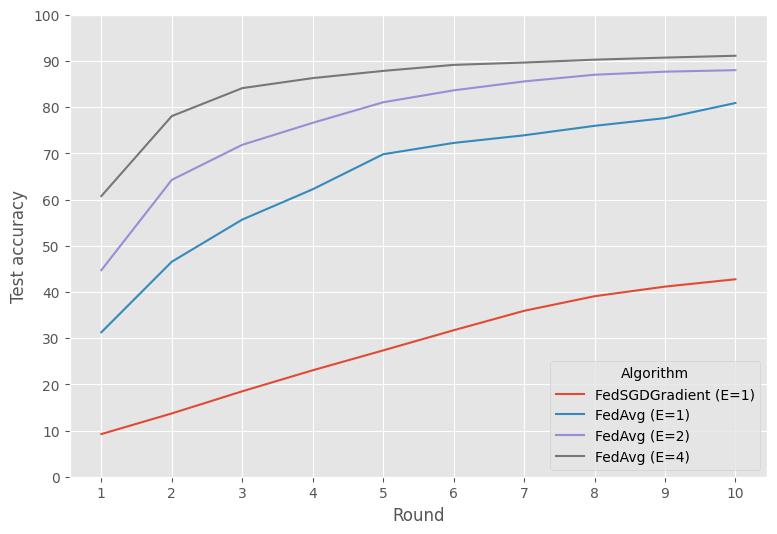

In [10]:
# Combined Plot
df = pd.concat(ex_a31_results, ignore_index=True)
df["Algorithm"] = df["Algorithm"] + " (E=" + df["E"].astype(str) + ")"

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))

sns.lineplot(df, x="Round", y="Test accuracy", hue="Algorithm", seed=seed, ax=ax)
ax.set_xticks(df["Round"].unique())
ax.set_yticks(np.arange(0, 101, 10));

Q: *How does FedAvg compare to FedSGD? What is the effect of increasing the work clients perform locally for each update in FedAvg?*

FedAvg performs much better than FedSGD, even when doing only 1 Epoch.
At each round of FedAvg, we are training on multiple clients for $E = \{1, 2, 4\}$ Epochs, then send the weights to update the model.
Meanwhile, in FedSGD, we only do 1 round and send the gradients instead.

Between the FedAvg runs, we see that a higher number of Epochs, resulting in more local work by the clients, leads to a better accuracy score.
With an Epoch of 2 and 4, we obtain very close test accuracy at 10 rounds.
However the clients must do twice the amount of work in the latter configuration.
An Epoch of 2 leads to a increase of almost 10 percentage points, while only losing a small amount of accuracy compared to 4 Epochs.


#### Answer A3-2: FedSGD vs FedAvg under an IID and non-IID split (15 rounds)

In [11]:
n = 100        # nr_clients (N)
lr = 0.01      # learning rate (lr)
c = 0.1        # client fraction (C)
e = 1          # nr local epochs (E)
b = 100        # batch size (B)
nr_rounds = 10 # nr rounds
iid = True     # independent and identically distributed
seed = 10      # seed for data generation

# FedSGD with iid = True
ex_a32_results = []

ex_a3_fedsgd_results = []
client_subsets = split(nr_clients=n, iid=True, seed=seed)

fedsgd_gradient_server = FedSgdGradientServer(
    lr=lr, client_subsets=client_subsets, client_fraction=c, seed=seed
)
fedsgd_df = fedsgd_gradient_server.run(nr_rounds=15).as_df()

fedsgd_df["Algorithm"] = fedsgd_df["Algorithm"] + f" (iid={True})"
ex_a32_results.append(fedsgd_df)

# FedSGD with iid = False
client_subsets = split(nr_clients=n, iid=False, seed=seed)

fedsgd_gradient_server = FedSgdGradientServer(
    lr=lr, client_subsets=client_subsets, client_fraction=c, seed=seed
)
fedsgd_df = fedsgd_gradient_server.run(nr_rounds=15).as_df()

fedsgd_df["Algorithm"] = fedsgd_df["Algorithm"] + f" (iid={False})"
ex_a32_results.append(fedsgd_df)


# FedAvg with iid = True
ex_a3_fedavg_results = []
client_subsets = split(nr_clients=n, iid=True, seed=seed)

fedavg_server = FedAvgServer(
    lr=lr, batch_size=b, client_subsets=client_subsets, client_fraction=c, nr_local_epochs=e, seed=seed
)
fedavg_df = fedavg_server.run(nr_rounds=15).as_df()

fedavg_df["Algorithm"] = fedavg_df["Algorithm"] + f" (iid={True})"
ex_a32_results.append(fedavg_df)

# FedAvg with iid = False
client_subsets = split(nr_clients=n, iid=False, seed=seed)

fedavg_server = FedAvgServer(
    lr=lr, batch_size=b, client_subsets=client_subsets, client_fraction=c, nr_local_epochs=e, seed=seed
)
fedavg_df = fedavg_server.run(nr_rounds=15).as_df()

fedavg_df["Algorithm"] = fedavg_df["Algorithm"] + f" (iid={False})"
ex_a32_results.append(fedavg_df)

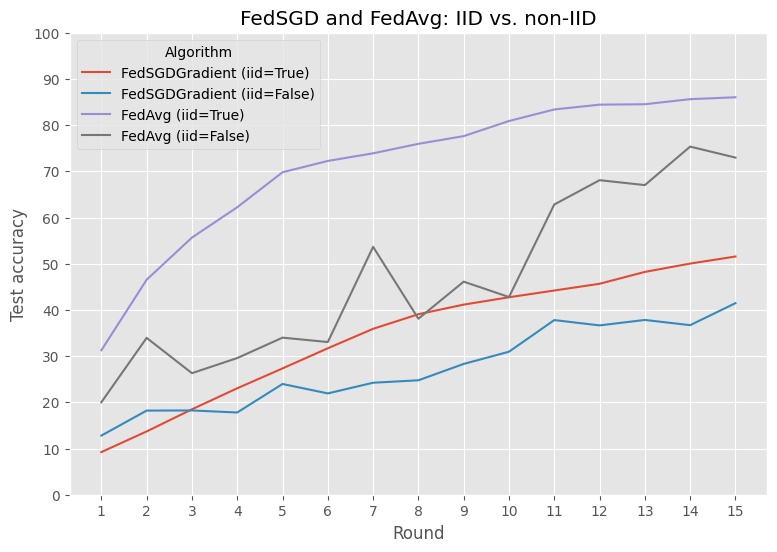

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))

df = pd.concat(ex_a32_results, ignore_index=True)
sns.lineplot(df, x="Round", y="Test accuracy", hue="Algorithm", seed=seed, ax=ax)

ax.set_xticks(df["Round"].unique())
ax.set_yticks(np.arange(0, 101, 10))
ax.set_title("FedSGD and FedAvg: IID vs. non-IID");

 Q: *How does the non-IID setting affect the accuracy achieved by the two algorithms? What is the difference in terms of the smoothness of learning?*



#### Answer A3-3: FedSGD vs FedAvg non-IID splits, with varying learning rates and client fractions

 (2 points) Make another plot for only non-IID splits, including the FedSGD and FedAvg configs from before, and add a version for each with a learning rate of 0.001 and client fraction of 0.5. How does the stability of the new variants compare to the old ones? Why do the changes in parameters have the observed effect?

In [13]:
n = 100        # nr_clients (N)
lr = 0.01      # learning rate (lr)
c = 0.1        # client fraction (C)
e = 1          # nr local epochs (E)
b = 100        # batch size (B)
nr_rounds = 10 # nr rounds
iid = True     # independent and identically distributed
seed = 10      # seed for data generation

ex_a33_results = []

### FedSGD with iid=False
client_subsets = split(nr_clients=n, iid=False, seed=seed)

# config 1: default lr and default fraction
fedsgd_gradient_server = FedSgdGradientServer(
    lr=lr, client_subsets=client_subsets, client_fraction=c, seed=seed
)
fedsgd_df = fedsgd_gradient_server.run(nr_rounds=15).as_df()

fedsgd_df["Algorithm"] = fedsgd_df["Algorithm"] + f" (lr={lr}, c={c})"
ex_a33_results.append(fedsgd_df)

# config 2: lr=0.001, fraction=0.5
fedsgd_gradient_server = FedSgdGradientServer(
    lr=0.001, client_subsets=client_subsets, client_fraction=0.5, seed=seed
)
fedsgd_df = fedsgd_gradient_server.run(nr_rounds=15).as_df()

fedsgd_df["Algorithm"] = fedsgd_df["Algorithm"] + f" (lr={0.001}, c={0.5})"
ex_a33_results.append(fedsgd_df)

### FedAvg with iid = False
client_subsets = split(nr_clients=n, iid=False, seed=seed)

# config 1: default lr and default fraction
fedavg_server = FedAvgServer(
    lr=lr, batch_size=b, client_subsets=client_subsets, client_fraction=c, nr_local_epochs=e, seed=seed
)
fedavg_df = fedavg_server.run(nr_rounds=15).as_df()

fedavg_df["Algorithm"] = fedavg_df["Algorithm"] + f" (lr={lr}, c={c})"
ex_a33_results.append(fedavg_df)

# config 2: lr=0.001, fraction=0.5
fedavg_server = FedAvgServer(
    lr=0.001, batch_size=b, client_subsets=client_subsets, client_fraction=0.5, nr_local_epochs=e, seed=seed
)
fedavg_df = fedavg_server.run(nr_rounds=15).as_df()

fedavg_df["Algorithm"] = fedavg_df["Algorithm"] + f" (lr={0.001}, c={0.5})"
ex_a33_results.append(fedavg_df)

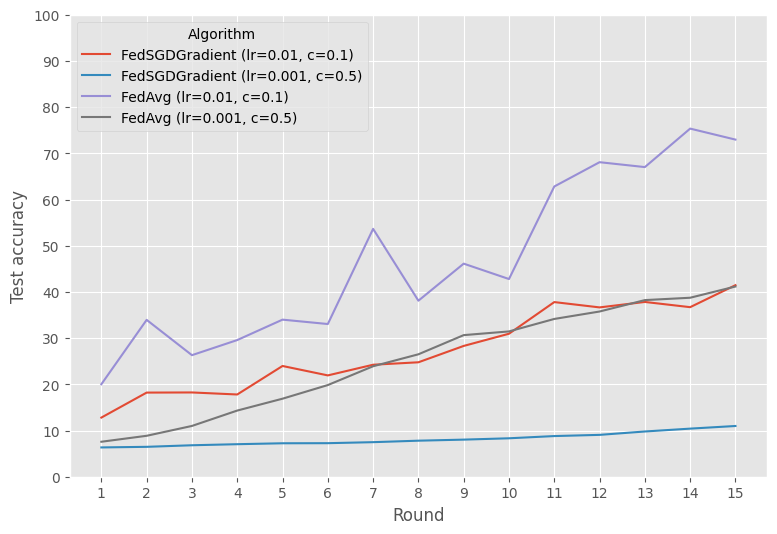

In [14]:
df = pd.concat(ex_a33_results, ignore_index=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))

sns.lineplot(df, x="Round", y="Test accuracy", hue="Algorithm", seed=seed, ax=ax)
ax.set_xticks(df["Round"].unique())
ax.set_yticks(np.arange(0, 101, 10));

Q: *How does the stability of the new variants compare to the old ones? Why do the changes in parameters have the observed effect?*


## Part B (12 points)

### Exercise B1: Microbatch Pipeline Model Parallelism (7 points)

Implement pipeline parallelism with microbatches, as discussed during the lab.

As with the other data/model parallelism examples, you will need a Python script for the nodes and a shell script to orchestrate execution.

Be aware of the possibility of deadlocks: due to how `good` operates, it is possible to deadlock by having device 1 send $B_2$ to device 2 in the forward pass, and simultaneously, device 2 send $B_1$ in the backward pass.
Since both operations will await a corresponding receive the training will stop indefinitely.

Use `isend` & `irecv`, the asynchronous (non-blocking) versions of `send` & `recv` in `torch.distributed`.
Add comments or text explaining how you expect your implementation to work and test that it runs for the same number of steps and model architecture as in class.

Note that `torch.distributed`'s implementation of `gloo` does not currently support properly asynchronous communication even when using the corresponding primitives.
Thus, you will not see the same improvements in speed as with a backend like `nccl`.

You may also take advantage of the fact that `torch` gradients naturally accumulate if zeroed out.
Also, scaling the loss by a constant is equivalent to scaling the resulting gradients by the same constant.

### Exercise B2: Joint Data & Model Parallelism (5 points)

Implement a training setup that uses data and model parallelism together.

Create 2 pipelines of 3 stages running sequentially, where each stage works with 3 sequential micro-batches.

Once again, add comments or text explaining your implementation and test it on the setting that mimics those from the class.

You can use groups from `torch.distributed` to handle operations that require interaction between a subset of more than two but less than all workers.